In [1]:
import pandas as pd # To manage/handle data
import numpy as np # For multidimensional array use
import seaborn as sns # For visualizations
import matplotlib.pyplot as plt # For visualizations
from sklearn import metrics, model_selection, tree
from sklearn.feature_extraction.text import CountVectorizer # Counter Vectorizer -- to tokenize words
from sklearn.model_selection import train_test_split # Split data into testing and training
from sklearn.tree import DecisionTreeClassifier # Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Confusion Matrix -- to visually analyze data accuracy
import re # regex

# Loading and Preparing Data

In [2]:
df = pd.read_csv('train.csv') # Loading our data.
print(df.head())

   count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [3]:
df['labels'] = df['class'].map({0: "Hate Speech", 1: "Offensive Language", 2: "Valid Speech"}) # Creating a 'labels' column based off the class.
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Valid Speech
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [4]:
df['labels'].value_counts() # Checking our labels value count

labels
Offensive Language    19190
Valid Speech           4163
Hate Speech            1430
Name: count, dtype: int64

## Pie Chart to display data frequency

Text(0.5, 1.0, 'Type of speech frequency')

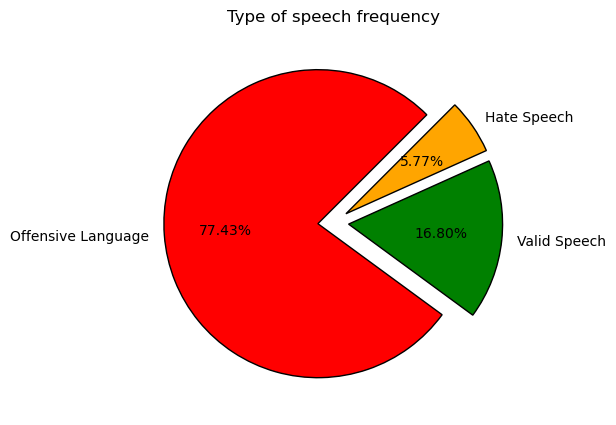

In [5]:
fig = plt.figure(figsize=(5,5)) # Pie Chart - The pie chart is a visualization tool to determine the frequency of each label.
colors = ('red', 'green', 'orange') # Pie chart Styling.
wp = {'linewidth':1, 'edgecolor':'black'} # Pie chart Styling.
tags = df['labels'].value_counts() # Value counts.
explode = (0.1, 0.1, 0.1) # Pie chart Styling.
tags.plot(kind='pie',autopct='%.2f%%', colors=colors, startangle=45, wedgeprops=wp, explode=explode, label='') # Pie chart Styling.
plt.title('Type of speech frequency') # Title.

In [6]:
# Displaying and setting up newly prepared data prior to cleaning our text.
df = df[['class', 'labels', 'tweet']] # Reducing df to columns that are needed -- class, lables, tweet.

In [7]:
# Function that we will use to clean our tweet data from unneccessary special characters.
def clean_text(text):
    text = str(text).lower() # Sets string to lowercase.
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|^rt|http.=?", '', text) # Using regex to remove unnecessary characters.
    return text

df['tweet'] = df['tweet'].apply(clean_text) # Cleaning the 'tweet' column
df

,class,labels,tweet
0,2,Valid Speech,rt as a woman you shouldnt complain about cl...
1,1,Offensive Language,rt boy dats coldtyga dwn bad for cuffin dat ...
2,1,Offensive Language,rt dawg rt you ever fuck a bitch and she st...
3,1,Offensive Language,rt ganderson based she look like a tranny
4,1,Offensive Language,rt the shit you hear about me might be true ...
...,...,...,...
24778,1,Offensive Language,yous a muthafin lie 8220 pearls emanuel right ...
24779,2,Valid Speech,youve gone and broke the wrong heart baby and ...
24780,1,Offensive Language,young buck wanna eat dat nigguh like i aint fu...
24781,1,Offensive Language,youu got wild bitches tellin you lies


In [8]:
# Function that removes and slices our frame. Takes in dataframe, frame, key as parameters.
def prepare_frames(df, key): # removes and slices. Takes in dataframe, frame, key.
    condition = df['class'] == key # Set condition to 0.
    frame = df.loc[condition] # Filtering condition .
    duplicate_rows = frame[frame.duplicated()] # Set duplicated rows.
    frame = frame.drop_duplicates() # Removing duplicated rows.
    frame = frame[0:1400] # Slice the data to 1400.
    return frame

In [9]:
hs = prepare_frames(df, 0)
ol = prepare_frames(df, 1)
v = prepare_frames(df, 2)

## Final data form

In [10]:
frames = [hs, ol, v] # Set all frames into an array.
df = pd.concat(frames) # Concat the frames.
df

,class,labels,tweet
85,0,Hate Speech,queer gaywad
89,0,Hate Speech,baby24 thunduh alsarabsss hes a beaner smh you...
110,0,Hate Speech,youre fucking gay blacklisted hoe holding ou...
184,0,Hate Speech,lmfaoooo i hate black people tcornvd2nlcdr th...
202,0,Hate Speech,at least im not a nigger tcorgja7cfoitlmfao
...,...,...,...
8181,2,Valid Speech,brilliant job by to limp it back to the pits ...
8200,2,Valid Speech,brown is a color so my eyes are colored
8201,2,Valid Speech,brownies brownies brownies
8202,2,Valid Speech,browns and redskins shouldnt be considered nfl...


## Bar chart to display even frequency.

<Axes: xlabel='labels', ylabel='count'>

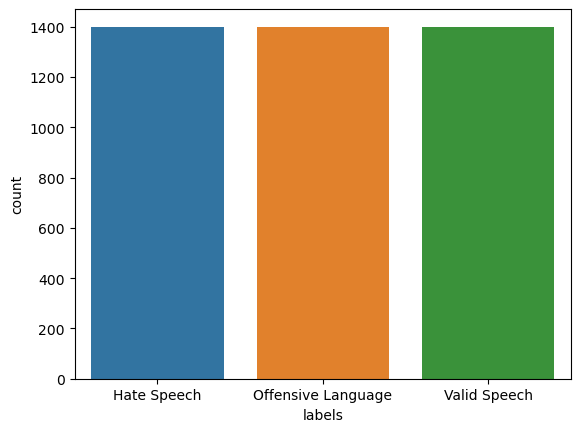

In [11]:
fig = plt.figure()
sns.countplot(x=df['labels'], data = df['class'])

# Learning and Predicting

In [12]:
X = np.array(df['tweet']) # Independent variable.
y = np.array(df['labels']) # Dependant variable.

cv = CountVectorizer() # Tokenizes our tweets - converts words into numbers.
X = cv.fit_transform(X) # Learns and transforms data.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.80,random_state=42,) # Splits data for training and testing.

dtc = DecisionTreeClassifier() # Creates a DecisionTreeClassifier model object.
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test) # Predicting with the model.

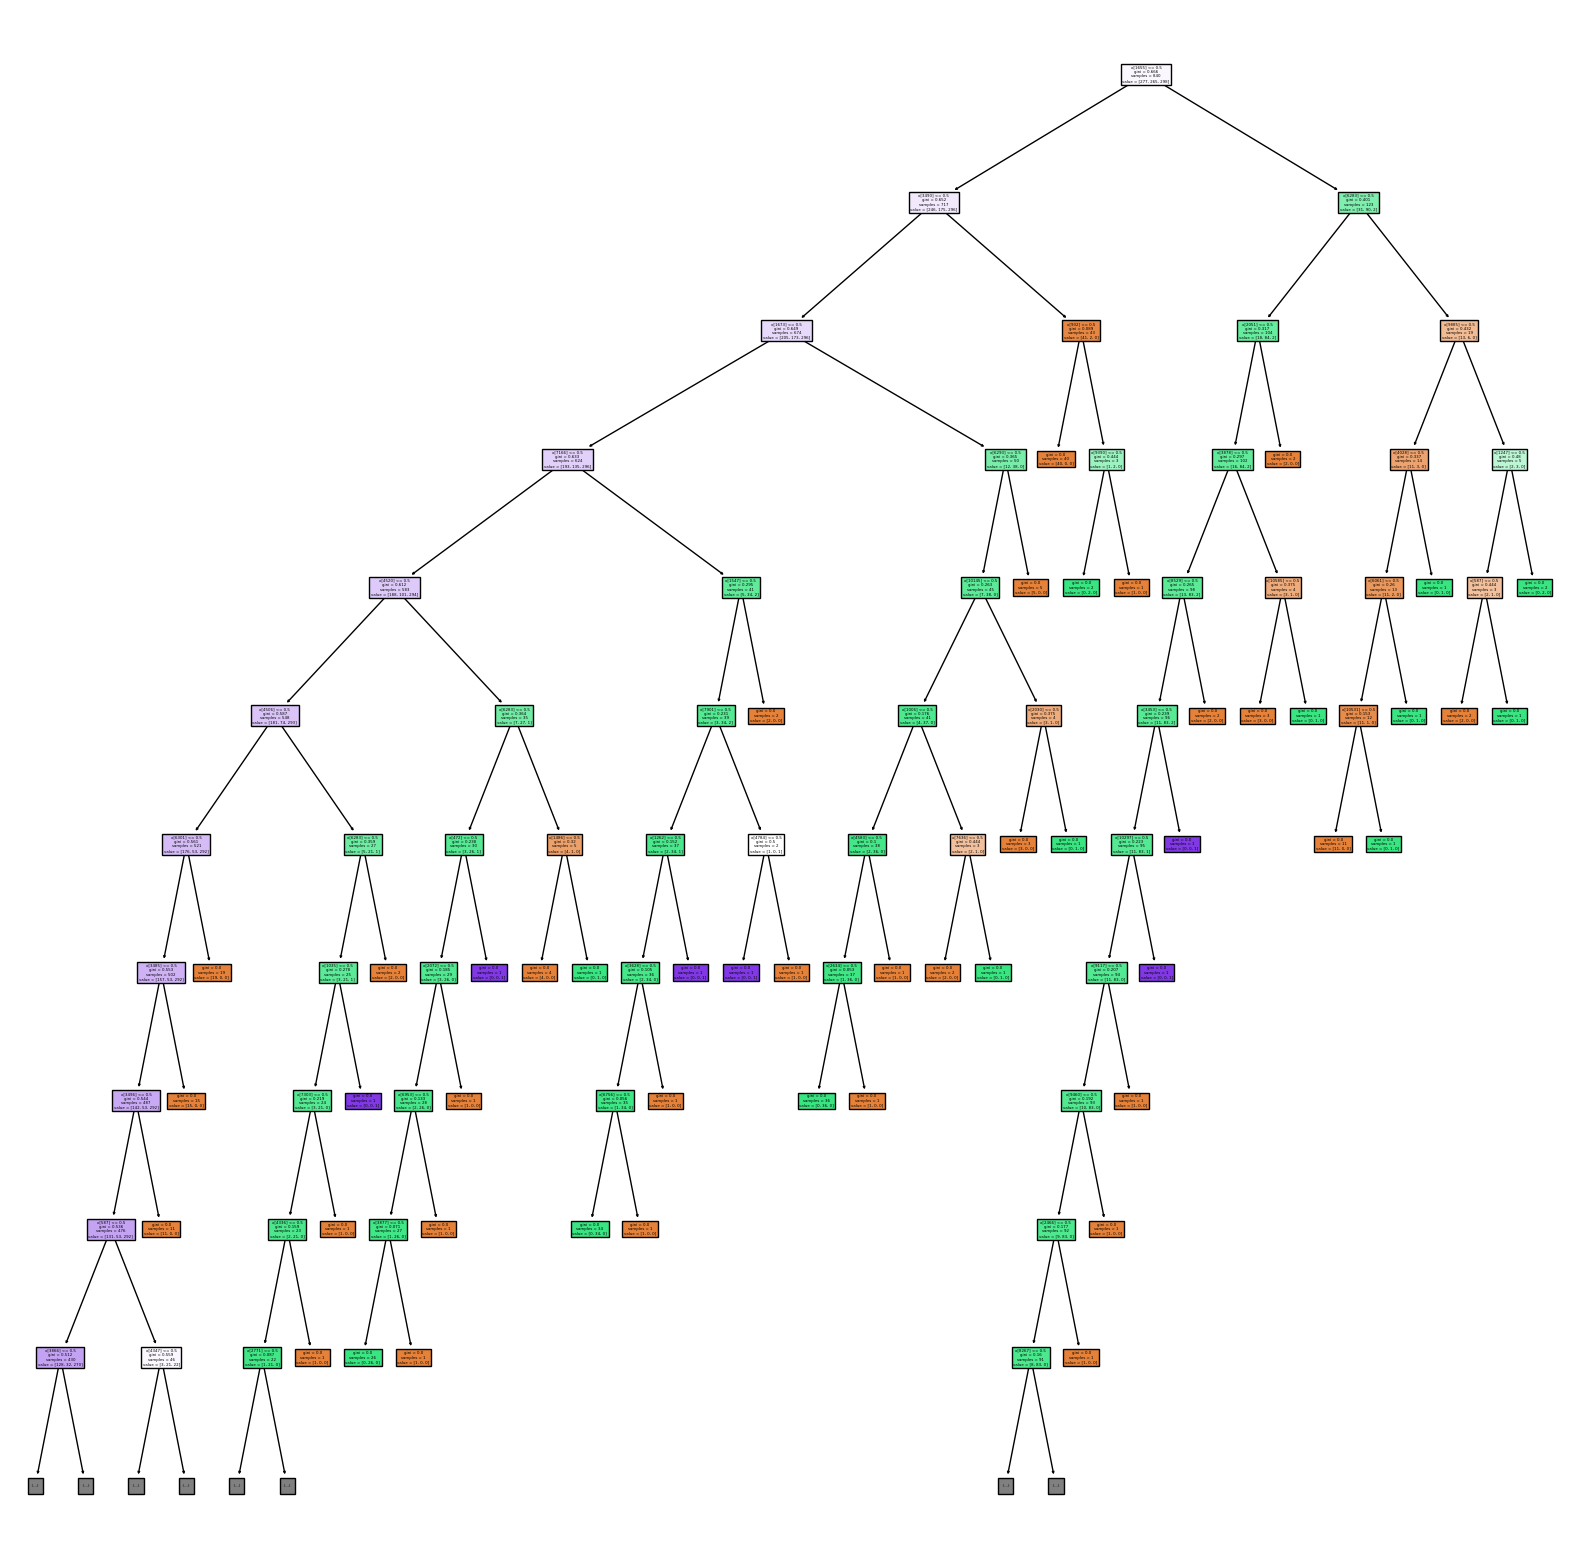

In [13]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dtc.fit(X_train, y_train),
                   max_depth=10,
                   filled=True)

# Accuracy

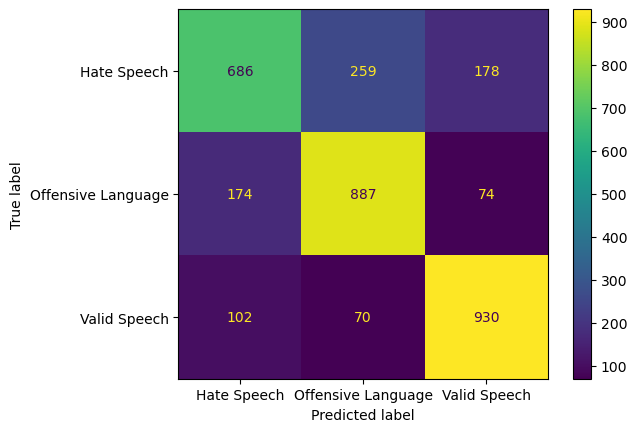

In [14]:
cm = confusion_matrix(y_test, dtc_pred, labels=dtc.classes_) # Confusion Matrix -- used to determine performance efficiency.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()

In [15]:
print('Accuracy Score:', f'{metrics.accuracy_score(dtc_pred, y_test)*100:.2f}%') # Accuracy score.

Accuracy Score: 74.49%


# User input - Enter text to see if input is vaild

In [17]:
test = input() # Grabs used input.
df = cv.transform([test]).toarray() # Toeknizes user's input.
result = dtc.predict(df) # Predicts the input.
print(result[0], 'Detected') # Returns the input.
print('Accuracy Score:', f'{metrics.accuracy_score(dtc_pred, y_test)*100:.2f}%') # Accuracy score.

 Hello my name is


Valid Speech Detected
Accuracy Score: 74.49%
